In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("dataset_heart.csv")

# Preview the data
print("First 5 rows:")
df.head()

First 5 rows:


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
print('Shape of the Dataset')
df.shape

Shape of the Dataset


(270, 14)

In [4]:
print('Dataset Information')
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11 

In [5]:
# Count missing values in each column
print("Missing Values Per Column:")
print(df.isnull().sum())

# Count total number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")


Missing Values Per Column:
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64
Total Duplicate Rows: 0


In [6]:
X = df.drop(columns=['heart disease'])
y = df['heart disease']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [8]:
from sklearn.ensemble import RandomForestClassifier

model_gini = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features='sqrt',      # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)

model_gini.fit(X_train, y_train)

y_pred_gini = model_gini.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_gini))

print(classification_report(y_test, y_pred_gini))

[[43  6]
 [13 19]]
              precision    recall  f1-score   support

           1       0.77      0.88      0.82        49
           2       0.76      0.59      0.67        32

    accuracy                           0.77        81
   macro avg       0.76      0.74      0.74        81
weighted avg       0.76      0.77      0.76        81



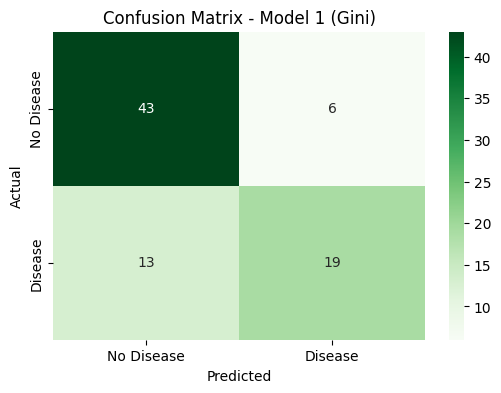

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Model 1 (Gini)")
plt.show()

In [11]:
model_entropy = RandomForestClassifier(
    n_estimators=100,                     # Number of trees in the forest
    criterion='entropy',                  # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,                       # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,                  # Minimum samples required to split an internal node
    min_samples_leaf=1,                   # Minimum samples required to be at a leaf node
    max_features='sqrt',                  # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,                       # Whether bootstrap samples are used when building trees
    oob_score=False,                      # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,                      # Seed for reproducibility
    n_jobs=-1,                            # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                             # Control verbosity of output
)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [12]:
print("Model 2 - Entropy:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))


Model 2 - Entropy:
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



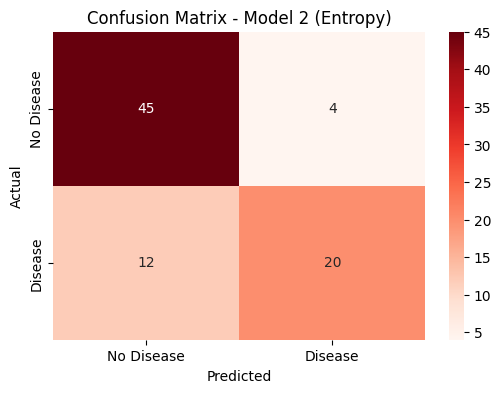

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Model 2 (Entropy)")
plt.show()


In [14]:
model_gini1 = RandomForestClassifier(
    n_estimators=200,         # Number of trees in the forest
    criterion='gini',      # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features='sqrt',      # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_gini1.fit(X_train, y_train)
y_pred_gini1 = model_gini1.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


In [15]:
print("Model 3 - Gini- with more number of trees:")
cm1= confusion_matrix(y_test, y_pred_gini1)
print(cm1)
print(classification_report(y_test, y_pred_gini1))


Model 3 - Gini- with more number of trees:
[[46  3]
 [13 19]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.85        49
           2       0.86      0.59      0.70        32

    accuracy                           0.80        81
   macro avg       0.82      0.77      0.78        81
weighted avg       0.81      0.80      0.79        81



In [16]:
model_gini2 = RandomForestClassifier(
    n_estimators=500,         # Number of trees in the forest
    criterion='gini',      # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features='sqrt',      # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_gini2.fit(X_train, y_train)
y_pred_gini2 = model_gini2.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


In [17]:
print("Model 4 - Gini- with more number of trees:")
cm2= confusion_matrix(y_test, y_pred_gini2)
print(cm2)
print(classification_report(y_test, y_pred_gini2))


Model 4 - Gini- with more number of trees:
[[46  3]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.94      0.86        49
           2       0.87      0.62      0.73        32

    accuracy                           0.81        81
   macro avg       0.83      0.78      0.79        81
weighted avg       0.82      0.81      0.81        81



In [18]:
model_gini3 = RandomForestClassifier(
    n_estimators=800,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features='sqrt',      # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_gini3.fit(X_train, y_train)
y_pred_gini3 = model_gini3.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 800 out of 800 | elapsed:    0.2s finished


In [19]:
print("Model 4 - Gini- with more number of trees:")
cm3= confusion_matrix(y_test, y_pred_gini3)
print(cm3)
print(classification_report(y_test, y_pred_gini3))


Model 4 - Gini- with more number of trees:
[[46  3]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.94      0.86        49
           2       0.87      0.62      0.73        32

    accuracy                           0.81        81
   macro avg       0.83      0.78      0.79        81
weighted avg       0.82      0.81      0.81        81



In [20]:
model_gini = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features=None,        # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [21]:
print("Model 5 - Gini:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))


Model 5 - Gini:
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



In [22]:
model_gini = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features=10,        # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [23]:
print("Model 5 - Gini:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))


Model 5 - Gini:
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



In [24]:
model_gini = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features=13,        # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [25]:
print("Model 5 - Gini:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))


Model 5 - Gini:
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



In [26]:
model_gini = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features=8,           # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [27]:
print("Model 5 - Gini:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

Model 5 - Gini:
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



In [28]:
model_gini = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features=0.5,        # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [29]:
print("Model 5 - Gini:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

Model 5 - Gini:
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



In [30]:
model_gini = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    criterion='gini',         # Function to measure the quality of a split ('gini' or 'entropy')
    max_depth=None,           # Maximum depth of each tree (None = nodes are expanded until all leaves are pure)
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be at a leaf node
    max_features=0.9,        # Number of features to consider when looking for the best split ('sqrt' is good for classification)
    bootstrap=True,           # Whether bootstrap samples are used when building trees
    oob_score=False,          # Whether to use out-of-bag samples to estimate generalization accuracy
    random_state=42,          # Seed for reproducibility
    n_jobs=-1,                # Number of jobs to run in parallel (-1 = use all processors)
    verbose=1                 # Control verbosity of output
)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
print("Model 5 - Gini:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

Model 5 - Gini:
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



Training Model 1 - Gini (sqrt)...
Evaluation Results - Model 1 - Gini (sqrt)
[[43  6]
 [13 19]]
              precision    recall  f1-score   support

           1       0.77      0.88      0.82        49
           2       0.76      0.59      0.67        32

    accuracy                           0.77        81
   macro avg       0.76      0.74      0.74        81
weighted avg       0.76      0.77      0.76        81



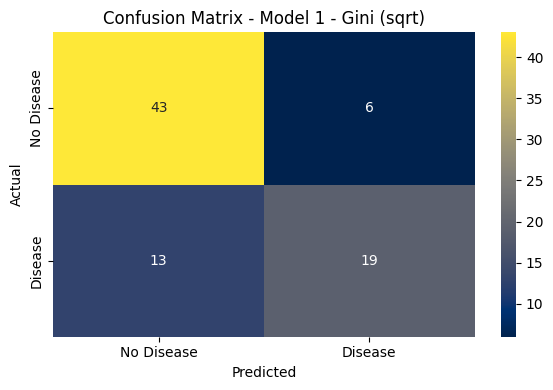

Training Model 2 - Entropy (sqrt)...
Evaluation Results - Model 2 - Entropy (sqrt)
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



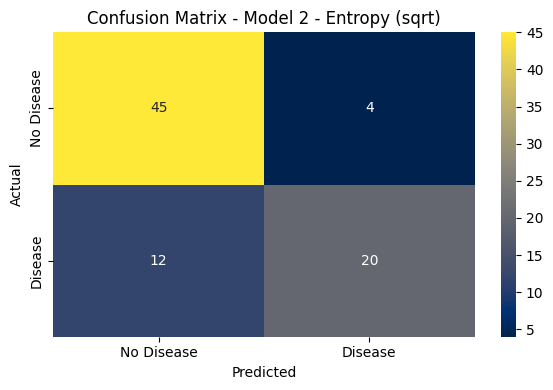

Training Model 3 - Gini (200 trees)...
Evaluation Results - Model 3 - Gini (200 trees)
[[46  3]
 [13 19]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.85        49
           2       0.86      0.59      0.70        32

    accuracy                           0.80        81
   macro avg       0.82      0.77      0.78        81
weighted avg       0.81      0.80      0.79        81



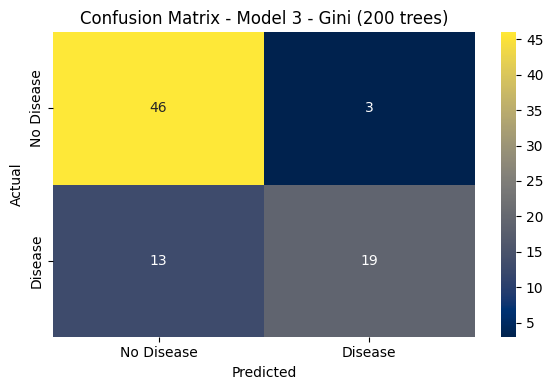

Training Model 4 - Gini (500 trees)...
Evaluation Results - Model 4 - Gini (500 trees)
[[46  3]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.94      0.86        49
           2       0.87      0.62      0.73        32

    accuracy                           0.81        81
   macro avg       0.83      0.78      0.79        81
weighted avg       0.82      0.81      0.81        81



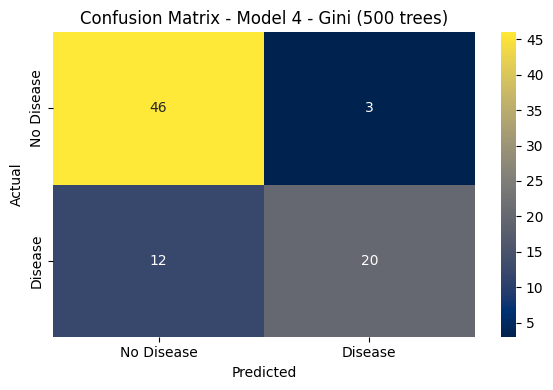

Training Model 5 - Gini (800 trees)...
Evaluation Results - Model 5 - Gini (800 trees)
[[46  3]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.94      0.86        49
           2       0.87      0.62      0.73        32

    accuracy                           0.81        81
   macro avg       0.83      0.78      0.79        81
weighted avg       0.82      0.81      0.81        81



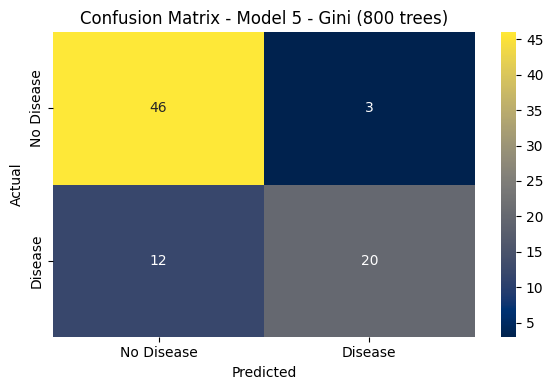

Training Model 6 - Gini (all features)...
Evaluation Results - Model 6 - Gini (all features)
[[43  6]
 [12 20]]
              precision    recall  f1-score   support

           1       0.78      0.88      0.83        49
           2       0.77      0.62      0.69        32

    accuracy                           0.78        81
   macro avg       0.78      0.75      0.76        81
weighted avg       0.78      0.78      0.77        81



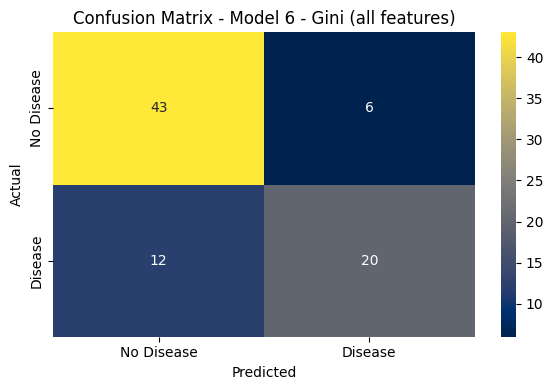

Training Model 7 - Gini (10 features)...
Evaluation Results - Model 7 - Gini (10 features)
[[46  3]
 [11 21]]
              precision    recall  f1-score   support

           1       0.81      0.94      0.87        49
           2       0.88      0.66      0.75        32

    accuracy                           0.83        81
   macro avg       0.84      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81



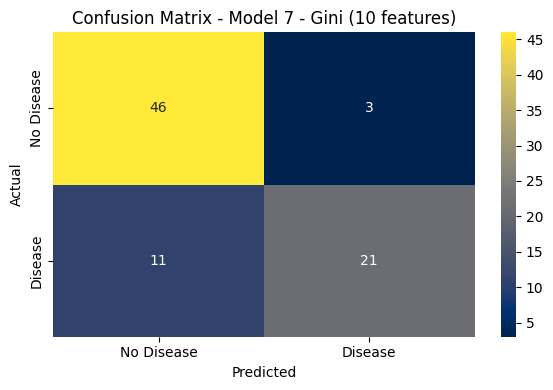

Training Model 8 - Gini (13 features)...
Evaluation Results - Model 8 - Gini (13 features)
[[43  6]
 [12 20]]
              precision    recall  f1-score   support

           1       0.78      0.88      0.83        49
           2       0.77      0.62      0.69        32

    accuracy                           0.78        81
   macro avg       0.78      0.75      0.76        81
weighted avg       0.78      0.78      0.77        81



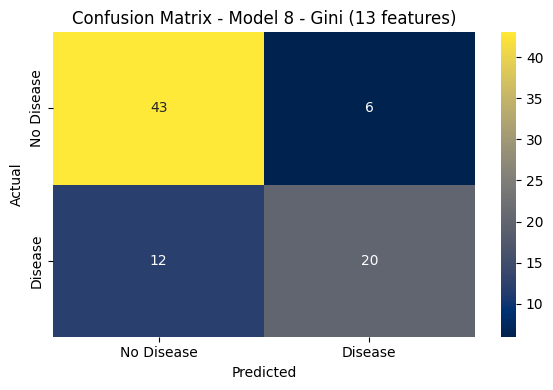

Training Model 9 - Gini (8 features)...
Evaluation Results - Model 9 - Gini (8 features)
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



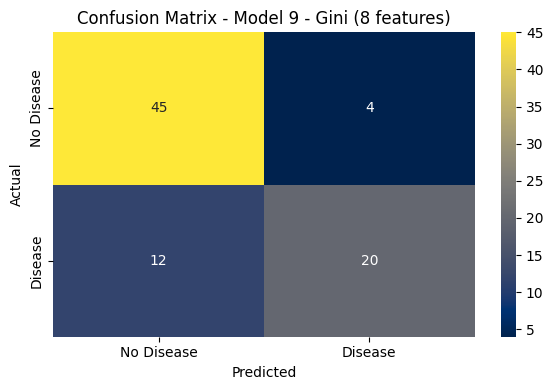

Training Model 10 - Gini (50% features)...
Evaluation Results - Model 10 - Gini (50% features)
[[45  4]
 [12 20]]
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        49
           2       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



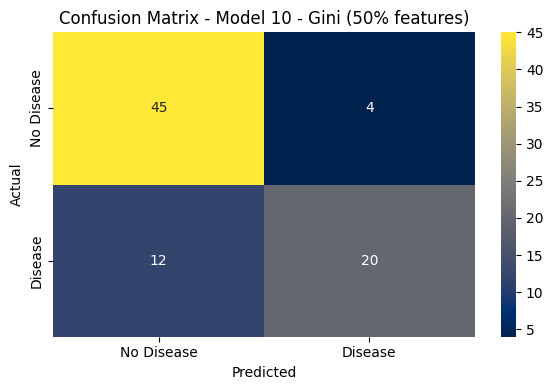

Training Model 11 - Gini (90% features)...
Evaluation Results - Model 11 - Gini (90% features)
[[44  5]
 [11 21]]
              precision    recall  f1-score   support

           1       0.80      0.90      0.85        49
           2       0.81      0.66      0.72        32

    accuracy                           0.80        81
   macro avg       0.80      0.78      0.79        81
weighted avg       0.80      0.80      0.80        81



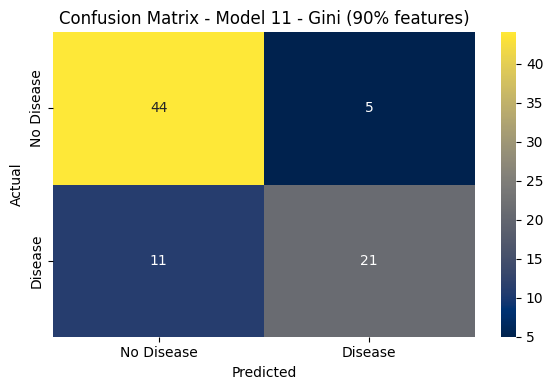

In [32]:
# Helper function to train and evaluate models
def train_and_evaluate(model, model_name):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    print(f"Evaluation Results - {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='cividis',
                xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# List of models to evaluate with different hyperparameters
models = [
    (RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt', random_state=42, n_jobs=-1), "Model 1 - Gini (sqrt)"),
    (RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt', random_state=42, n_jobs=-1), "Model 2 - Entropy (sqrt)"),
    (RandomForestClassifier(n_estimators=200, criterion='gini', max_features='sqrt', random_state=42, n_jobs=-1), "Model 3 - Gini (200 trees)"),
    (RandomForestClassifier(n_estimators=500, criterion='gini', max_features='sqrt', random_state=42, n_jobs=-1), "Model 4 - Gini (500 trees)"),
    (RandomForestClassifier(n_estimators=800, criterion='gini', max_features='sqrt', random_state=42, n_jobs=-1), "Model 5 - Gini (800 trees)"),
    (RandomForestClassifier(n_estimators=100, criterion='gini', max_features=None, random_state=42, n_jobs=-1), "Model 6 - Gini (all features)"),
    (RandomForestClassifier(n_estimators=100, criterion='gini', max_features=10, random_state=42, n_jobs=-1), "Model 7 - Gini (10 features)"),
    (RandomForestClassifier(n_estimators=100, criterion='gini', max_features=13, random_state=42, n_jobs=-1), "Model 8 - Gini (13 features)"),
    (RandomForestClassifier(n_estimators=100, criterion='gini', max_features=8, random_state=42, n_jobs=-1), "Model 9 - Gini (8 features)"),
    (RandomForestClassifier(n_estimators=100, criterion='gini', max_features=0.5, random_state=42, n_jobs=-1), "Model 10 - Gini (50% features)"),
    (RandomForestClassifier(n_estimators=100, criterion='gini', max_features=0.9, random_state=42, n_jobs=-1), "Model 11 - Gini (90% features)")
]

# Loop through each model and evaluate
for model, name in models:
    train_and_evaluate(model, name)